In [7]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd

ox.config(log_console=True, use_cache=True)
weight_by_length = False

ox.__version__

/usr/local/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.2'

In [8]:
places = {
    'London': 'London, UK',
}

In [9]:
# verify OSMnx geocodes each query to what you expect (a [multi]polygon geometry)
gdf = [ox.geocode_to_gdf(p) for p in places.values()]
gdf

[                                            geometry  bbox_north  bbox_south  \
 0  POLYGON ((-0.51038 51.46809, -0.51036 51.46795...   51.691874    51.28676   
 
    bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
 0   0.334016  -0.510375  344385499  relation   65606  51.507322 -0.127647   
 
                                       display_name  class  type  importance  
 0  London, Greater London, England, United Kingdom  place  city    0.940783  ]

In [11]:
# G = ox.graph_from_place('London, UK', network_type='drive')

In [13]:
# Gu = ox.add_edge_bearings(ox.get_undirected(G))

In [ ]:
# fig = ox.plot_orientation(Gu, title='London', title_font='Econ Sans')[0]
# # suptitle_font = {'family':'Econ Sans', 'fontsize':24, 'fontweight':'normal', 'y':1.07, 'fontstyle': 'normal'}
# # fig.suptitle('London, UK', **suptitle_font)
# fig.tight_layout()
# fig.subplots_adjust(hspace=0.35)
# fig.savefig('plots/london.svg', bbox_inches='tight')
# fig

2022-12-13 14:41:11.643702 London
saving plots/London.svg


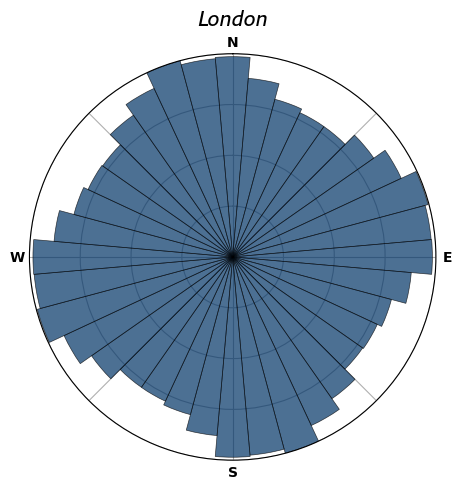

In [39]:
plots = {}
for place in sorted(places.keys()):
    print(datetime.datetime.now(), place)
    
    # get the graph
    query = places[place]
    G = ox.graph_from_place(query, network_type='drive')
    
    # calculate edge bearings
    Gu = ox.add_edge_bearings(ox.get_undirected(G))

    title_font = {'family':'Econ Sans', 'fontsize': 16, 'fontweight':'normal', 'y':1.07, 'fontstyle': 'normal'}
    fig = ox.plot_orientation(
        Gu,
        title=place,
        title_font=title_font,
    )[0]
    fig.tight_layout()
    print(f'saving plots/{place}.svg')
    fig.savefig(f'plots/{place}.svg', bbox_inches='tight')
